In [1]:

from bayes import *
from files import TranscriptionFileHandler, FileType
from transcribers.transcribe import get_video_id, transcribe_ads
import pandas as pd
import nltk


def download_nltk_data():
    try:
        nltk.data.find("tokenizers/punkt")
        nltk.data.find("corpora/stopwords")
        nltk.data.find("corpora/wordnet")
    except LookupError:
        nltk.download("punkt")
        nltk.download("stopwords")
        nltk.download("wordnet")


download_nltk_data()

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



[nltk_data] Downloading package punkt to /home/arunang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arunang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/arunang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:

files = TranscriptionFileHandler()

pre_processors = [substitution_preprocessor, stopword_preprocessor]
model = NaiveBayesClassifier(preprocessors=pre_processors)

In [3]:


if not files.check_resouce_exists():
    files.transcribe_and_save_videos(training_videos, FileType.TRAINING)
    files.transcribe_and_save_videos(testing_videos, FileType.TESTING)

if not files.check_resouce_exists(FileType.PREPROCESSED):
    training_data = files.load_data(FileType.TRAINING)

    clean_training_data = model.preprocess_words(pd.concat(training_data))

    files.dump_preprocessed_words(clean_training_data)
else:
    clean_training_data = pd.concat(files.load_data(FileType.PREPROCESSED))


Chunking words...
Preprocessing text...


100%|██████████| 23406739/23406739 [00:26<00:00, 875684.80it/s]


In [4]:

model.train(training_data=clean_training_data)

Counting ham words...: 100%|██████████| 21655841/21655841 [00:05<00:00, 3718651.71it/s]


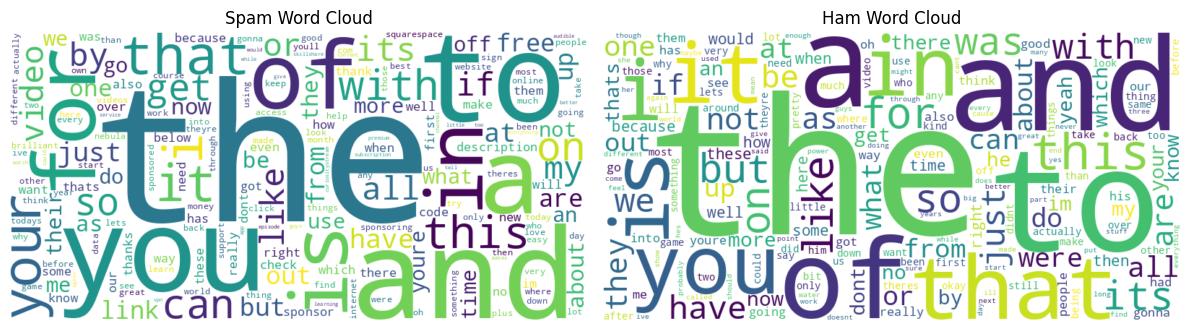

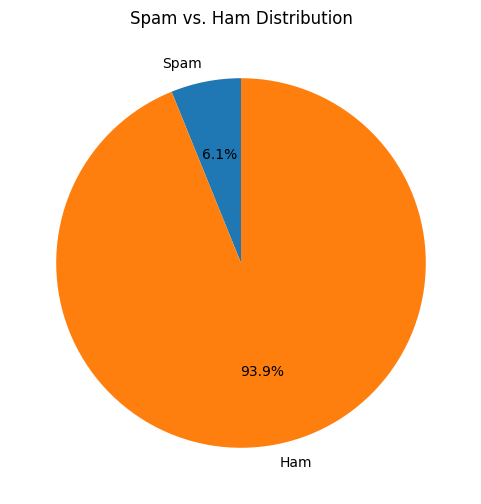

/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:303: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([word[0] for word in top_spam_words], rotation=45)
/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:313: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([word[0] for word in top_ham_words], rotation=45)


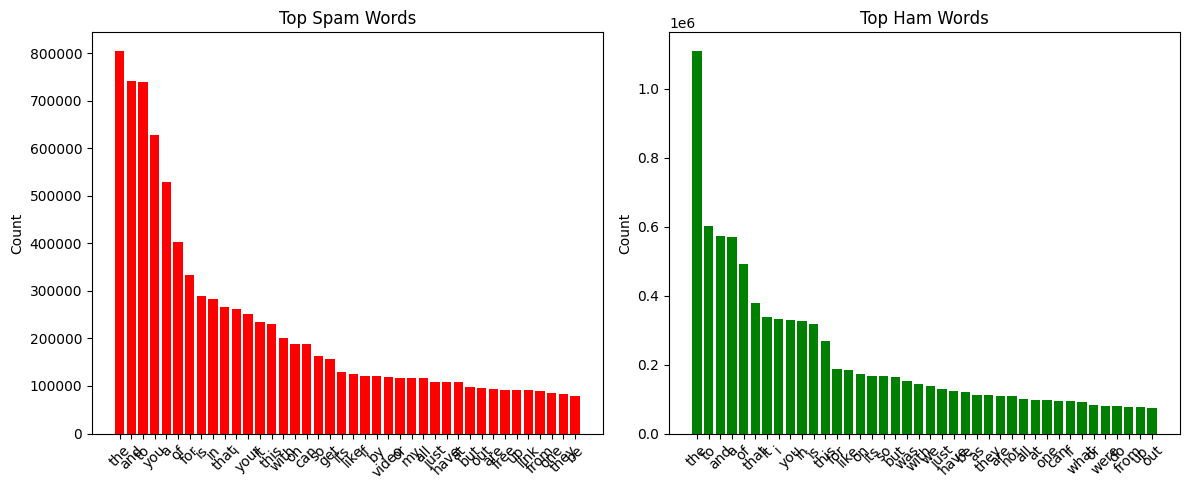

In [5]:

visualize_words(model)
visualize_data_summary(model)
visualize_top_words(model, 40)


Chunking words...
Preprocessing text...


100%|██████████| 5166/5166 [00:03<00:00, 1343.89it/s]


Spam words (0.5 threshold):
Spam: 0:00:00.420000      Word: this                Ad: True                Average spam: 0.7132295762785975
Spam: 0:00:00.780000      Word: video               Ad: True                Average spam: 0.7467570831363923
Spam: 0:00:01.140000      Word: is                  Ad: True                Average spam: 0.6024139406966739
Spam: 0:00:01.500000      Word: sponsored           Ad: True                Average spam: 0.518538964820781
Spam: 0:31:44.900000      Word: who                 Ad: True                Average spam: 0.5198234839534277
Spam: 0:31:45.300000      Word: gave                Ad: True                Average spam: 0.5398234837857645
Spam: 0:31:45.710000      Word: you                 Ad: True                Average spam: 0.5598234837659516
Spam: 0:31:46.120000      Word: these               Ad: True                Average spam: 0.5798234836908636
Spam: 0:31:46.520000      Word: batteries           Ad: True                Average spam: 0.599823482

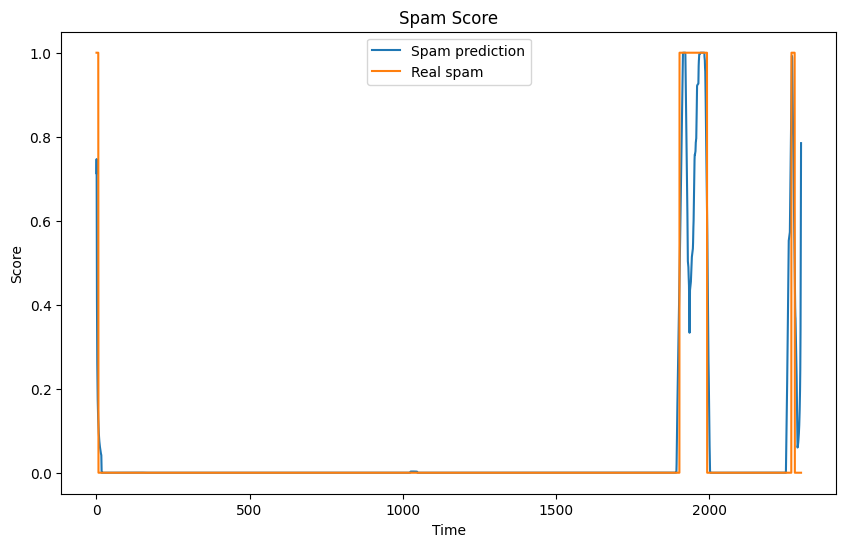

In [7]:
testing_data = files.load_data(FileType.TESTING)
for frame in testing_data:
    clean_data = model.preprocess_words(frame)
    classification = model.classify_text(testing_data=clean_data)
    model.evaluate_classification(classification)